# Modificiaciones del método de Euler

__Ejercicio 1:__ Implementar método implicito de Euler

El método implicito es:
$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$
Si tenemos a $x_0$, $\rightarrow x_1-f(x_1,t_1)h=x_0$  
Así tenemos una ecuación: $g(x)=x-f(x,t_1)h-x_0=0$. así   
$$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$ Y queremos que $$x_{n+1}=\lim_{k\to \infty}\tilde x_k,$$

Tomamos $\tilde x_0$ lo mas cerca posible de $x_1$, lo más prudente es tomar $\tilde x_0=x_0$. Por lo tanto, para cualquier paso tenemos que si conocemos $x_n$, entonces $x_{n+1}$ esta dado por el límite.

In [1]:
using SymPy
function metodoNR(g,x0,n=50)
    z=symbols("z")
    #Volvemos a g, como un simbolo:
    f=g(z)
    #Calculamos su derivada
    df=simplify(diff(f))
    #Queremos operar con f y df como función de julia:
    dg=lambdify(df,[z])
    #Metodo de Newton-Raphson para el punto x0
    x=x0
    #METODO DE NEWTON-RAPSON
    for i in 1:n
        y=x-(g(x))/(dg(x))
        x=y
    end
    return x
end

function metodo_eulerimp(f,x0,ti,tf,n,m=50)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #TOmamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    #Método de Euler implicito
    for i in 2:length(listt)
        g(x)=x-f(x,listt[i])*h-listx[i-1]
        X=listx[i-1]
        #Aquí se encuentra "x" por el método de NR
        y=metodoNR(g,X,m)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_eulerimph(f,xi,ti,tf,h,m=50)
    #Calculo de n dado h
    n=Int((tf-ti)/h)
    return metodo_eulerimp(f,xi,ti,tf,n,m)
end;

----------
__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

Este método esta dado por la siguiente relación de recurrencia:
$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n+1/2}\right).$$ Donde se observa que $t_{n+ \frac{1}{2}}=t_n+\frac{h}{2}$

In [2]:
function metodo_eulermedio(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Euler medio
    for i in 1:length(listt)-1
        y=x+h*f(x+(h/2)*f(x,listt[i]),listt[i]+(h/2))
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_eulermedioh(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int((tf-ti)/h)
    return metodo_eulermedio(f,xi,ti,tf,n)
end;

---------
__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

El método se escribe como sigue:
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(x_n,t_n),\\
k_2&=f(x_n+\frac{h}{2}k_1,t_{n+1/2}),\\
k_3&=f(x_n+\frac{h}{2}k_2,t_{n+1/2}),\\
k_4&=f(x_n+h k_3,t_{n+1}).\\
\end{align*}

Donde, recordemos que: $t_{n+ \frac{1}{2}}=t_n+\frac{h}{2}$

In [3]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int((tf-ti)/h)
    return metodo_RK4(f,xi,ti,tf,n)
end;

-----
__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

El cual mencionaba lo siguiente:   
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva.

In [4]:
α=2.5
ti=0
tf=8
f(x,t)=-α*x;

In [5]:
#Soluciones analiticas:
#Para x_0=1
listt=linspace(0,8,1000)
listx1=[]
for i in 1:length(listt)
    x=1*exp(-α*listt[i])
    push!(listx1,x)
end
Dato1=listt,listx1

#Para x_0=2
listt=linspace(0,8,1000)
listx2=[]
for i in 1:length(listt)
    x=2*exp(-α*listt[i])
    push!(listx2,x)
end
Dato2=listt,listx2;

Para $x_0=1$

In [6]:
#Datos con distintas condiciones iniciales
Dato1_1=metodo_eulerimph(f,1,ti,tf,1)
Dato2_1=metodo_eulerimph(f,1,ti,tf,.5)
Dato3_1=metodo_eulerimph(f,1,ti,tf,.2)
Dato4_1=metodo_eulerimph(f,1,ti,tf,.01);

  likely near In[6]:2
  likely near In[6]:2
  likely near In[6]:2
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


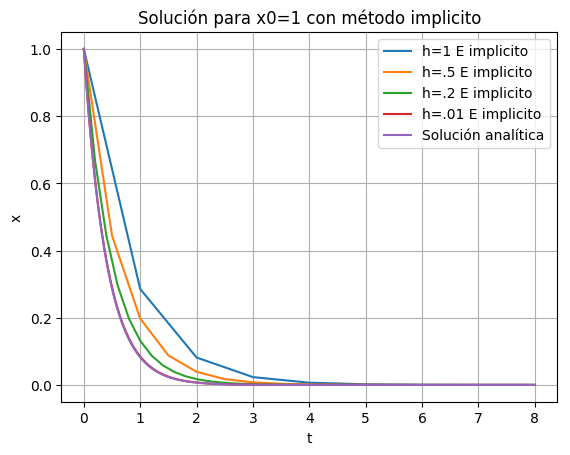

In [7]:
using PyPlot
#Graficación
plot(Dato1_1[1],Dato1_1[2],label="h=1 E implicito")
plot(Dato2_1[1],Dato2_1[2],label="h=.5 E implicito")
plot(Dato3_1[1],Dato3_1[2],label="h=.2 E implicito")
plot(Dato4_1[1],Dato4_1[2],label="h=.01 E implicito")
plot(Dato1[1],Dato1[2],label="Solución analítica")
legend()
title("Solución para x0=1 con método implicito")
xlabel("t")
ylabel("x")
grid("on")
show()

Para $x_0=2$

In [8]:
#Datos con distintas condiciones iniciales
Dato1_2=metodo_eulerimph(f,2,ti,tf,1)
Dato2_2=metodo_eulerimph(f,2,ti,tf,.5)
Dato3_2=metodo_eulerimph(f,2,ti,tf,.2)
Dato4_2=metodo_eulerimph(f,2,ti,tf,.01);

  likely near In[8]:2
  likely near In[8]:2
  likely near In[8]:2
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


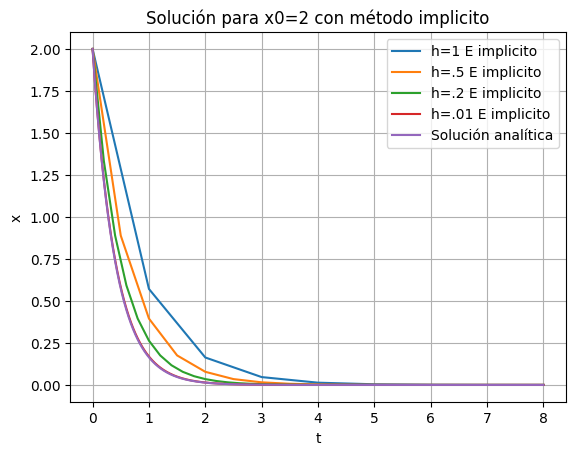

In [9]:
using PyPlot
#Graficación
plot(Dato1_2[1],Dato1_2[2],label="h=1 E implicito")
plot(Dato2_2[1],Dato2_2[2],label="h=.5 E implicito")
plot(Dato3_2[1],Dato3_2[2],label="h=.2 E implicito")
plot(Dato4_2[1],Dato4_2[2],label="h=.01 E implicito")
plot(Dato2[1],Dato2[2],label="Solución analítica")
legend()
title("Solución para x0=2 con método implicito")
xlabel("t")
ylabel("x")
grid("on")
show()

__Comparación__   
Para hacer una mejor comparación grafiquemos lo que obtuvimos en la tarea 11. Para $x_0=1$

In [10]:
#Método de Euler USUAL (COPY PASTE)
#n es el número de intervalos que tendrá la partición
function metodo_euler(f,x0,ti,tf,n)
    #El comando linespace genera subintervalos con n+1 elEentos
    listt=linspace(ti,tf,n+1)
    #Con una distancia h, y para cada tk se cumple tk=t0+mh con m de 0 a n
    h=(tf-ti)/n
    listx=[]
    x=x0
    #Se pone la condición inicial para ti
    push!(listx,x)
    #La serie de recurrencia para nuestro intervalo
    for i in 2:(n+1)
        #x es el elEento inmediato inferior y y el superior
        y=x+h*f(x,listt[i])
        push!(listx,y)
        #Aquí se pasa al siguiente dato
        x=y
    end
    return listt, listx
end

#Función para encontrar n dada h
function intervalo(h,ti=0,tf=8)
    n=(tf-ti)/h
    return Int(n)
end

#Se crea la misma función pero evaluando en h
function metodo_eulerh(f,x0,ti,tf,h)
    n=intervalo(h)
    return metodo_euler(f,x0,ti,tf,n)
end

metodo_eulerh (generic function with 1 method)

In [11]:
#Recolección de datos
DatoE1_2=metodo_eulerh(f,1,ti,tf,.5)
DatoE1_3=metodo_eulerh(f,1,ti,tf,.2)
DatoE1_4=metodo_eulerh(f,1,ti,tf,.01);

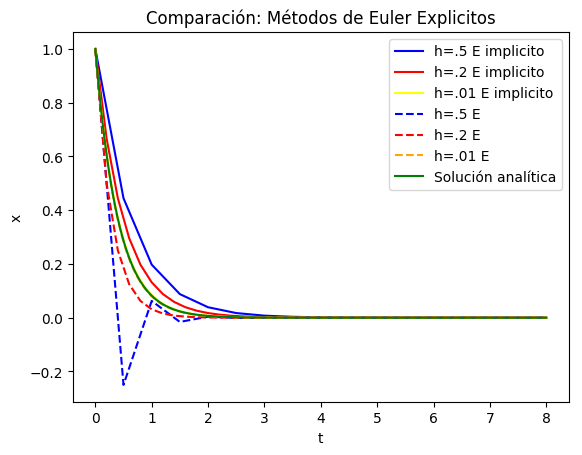

In [12]:
#Graficación
using PyPlot
plot(Dato2_1[1],Dato2_1[2],label="h=.5 E implicito", color="blue")
plot(Dato3_1[1],Dato3_1[2],label="h=.2 E implicito", color="red")
plot(Dato4_1[1],Dato4_1[2],label="h=.01 E implicito", color="yellow")
plot(DatoE1_2[1],DatoE1_2[2],linestyle="--",label="h=.5 E ", color="blue")
plot(DatoE1_3[1],DatoE1_3[2],linestyle="--",label="h=.2 E ", color="red")
plot(DatoE1_4[1],DatoE1_4[2],linestyle="--",label="h=.01 E ", color="orange")
plot(Dato1[1],Dato1[2],label="Solución analítica", color="green")
legend()
title("Comparación: Métodos de Euler Explicitos")
xlabel("t")
ylabel("x")
show()

Podemos ver con esta graficación que el método de Euler implicito es más fiel a la forma de la solución analítica original para este caso, desde el principio. Así el método implícito tiene un error menor con respecto al original cuando el tamaño de intervalo es grande. AdEás se observa que cuando h=.01 (y dada la escala), ambas funciones Ebonan muy bien con la solución analítica. Una gran diferencia que se observa en este caso es que el método de Euler implicito Epieza aproximarse con valores superiores a la solución mientras que el normal con valores inferiores.

-----
__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta y punto medio.__

In [13]:
#Solucion analitica:
listt5=linspace(0,2,1000)
listx5=[]
for i in 1:length(listt5)
    x=4+8*listt5[i]-5*(listt5[i])^2
    push!(listx5,x)
end
Ejercicio5=listt5,listx5;

In [14]:
#condiciones del problema
xi=4
ti=0
tf=2
h=.2
f5(x,t)=(2x-18t)/(1+t)

f5 (generic function with 1 method)

In [15]:
#Datos
Dato5_medio=metodo_eulermedioh(f5,xi,ti,tf,h)
Dato5_RK4=metodo_RK4h(f5,xi,ti,tf,h);

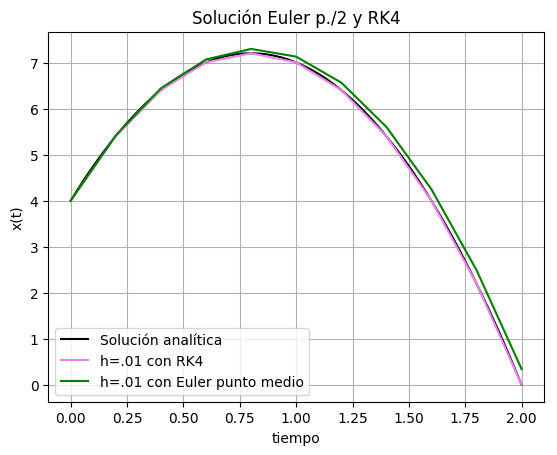

In [16]:
#Graph
using PyPlot
plot(Ejercicio5[1],Ejercicio5[2],label="Solución analítica", color="Black")
plot(Dato5_RK4[1],Dato5_RK4[2], label="h=.01 con RK4", color="violet")
plot(Dato5_medio[1],Dato5_medio[2], label="h=.01 con Euler punto medio", color="green")
grid("on")
legend()
ylabel("x(t)")
xlabel("tiempo")
title("Solución Euler p./2 y RK4")
show()

Lo que completa el test

-----
__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícitos de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.


La energía esta dada como: $E=K+V$
Donde $K=\frac{m\dot{x}^2}{2}$ y $V=-\int F dx$ y $F=-kx$. Es así como:
$E=\frac{m\dot{x}^2}{2}+\frac{kx^2}{2}$.

Además el oscilador armónico cumple que:
$
\left(
\begin{array}{cccc} x\\ \dot{x}\\ \end{array}
\right)
=
\left(
\begin{array}{cccc} \dot{x}\\ -kx\\ \end{array}
\right)
$
. Así y por simplicidad, modelaremos para una masa $m=1$ y una constante de resorte $k=1$
$$
\left(
\begin{array}{cccc} x\\ \dot{x}\\ \end{array}
\right)
=
\left(
\begin{array}{cccc} \dot{x}\\ -x\\ \end{array}
\right)   ;   
E=\frac{1}{2}(\dot{x}^2+x^2)
$$
Donde además si soponemos que sabemos $x(0)$ y $\dot{x(0)}$, al resolver su ecuación de movimiento con estas condiciones tenEos que:
$$x(t)=x(0)cos(t)+\dot{x}(0)sin(t)$$
Es así como seleccionamos por simplicidad al vector $\bar{x}(0)=\left(
\begin{array}{c} 1\\ 0\\ \end{array}
\right)$ para así tener una ecuación de movimiento y energía:
$$x(t)=cost  ;  E=\frac{1}{2}$$  

Ahora bien, en el programa, harEos x[1]=$x$ y x[2]=$\dot{x}$

In [17]:
#Condiciones del problema
F(x,t)=[x[2],-x[1]]
X0=[1,0]
Ti=0
Tf=2*pi
h=1
#Calculo de la mejor n
n=Int(round((Tf-Ti)/h)

LoadError: [91msyntax: incomplete: premature end of input[39m

In [18]:
#Datos obtenidos
X_RK4=metodo_RK4(F,X0,Ti,Tf,n)
X_EM=metodo_eulermedio(F,X0,Ti,Tf,n)
X_E=metodo_euler(F,X0,Ti,Tf,n);

LoadError: [91mUndefVarError: n not defined[39m

In [19]:
#calculo de energías
E_EM=[X_EM[1],((map(x->x[1],X_EM[2])).^2+(map(x->x[2],X_EM[2])).^2)/2]
E_RK4=[X_RK4[1],((map(x->x[1],X_RK4[2])).^2+(map(x->x[2],X_RK4[2])).^2)/2]
E_E=[X_E[1],((map(x->x[1],X_E[2])).^2+(map(x->x[2],X_E[2])).^2)/2];

LoadError: [91mUndefVarError: X_EM not defined[39m

In [20]:
#Graph
using PyPlot
plot(E_E[1],E_E[2],label="Método de Euler")
plot(E_EM[1],E_EM[2],label="Método de Euler (punto medio)")
plot(E_RK4[1],E_RK4[2],label="Método de Runge Kutta de orden 4")
plot(linspace(0,2*pi,2),1/2*[1,1], label="Solución analítica", color="black")
legend()
title("Comparación de la energía en cada aproximación [h=1]")
xlabel("Tiempo")
ylabel("Energía")
show()

LoadError: [91mUndefVarError: E_E not defined[39m

-------------
__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 

In [21]:
F(x,t)=[x[2],-x[1]]
X70=[1,0]
T7i=0
T7f=10*pi
h7=.01
#Calculo de la mejor n
n7=Int(round((T7f-T7i)/h7))

3142

In [22]:
#Datos
X_RK4=metodo_RK4(F,X70,T7i,T7f,n7)
X_EM=metodo_eulermedio(F,X70,T7i,T7f,n7)
X_E=metodo_euler(F,X70,T7i,T7f,n7);

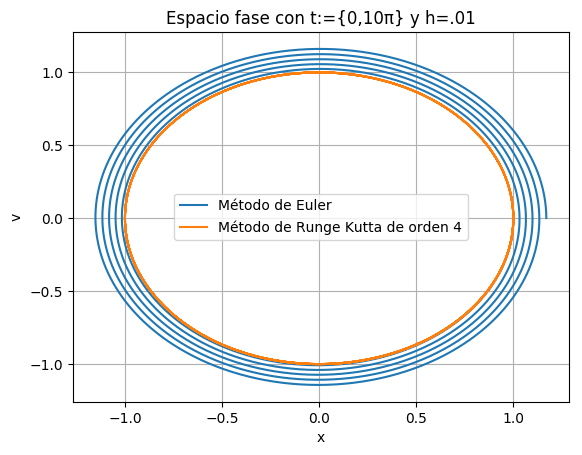

In [23]:
#Graph
using PyPlot
plot(map(x->x[1],X_E[2]),map(x->x[2],X_E[2]),label="Método de Euler")
plot(map(x->x[1],X_RK4[2]),map(x->x[2],X_RK4[2]),label="Método de Runge Kutta de orden 4")
legend()
title("Espacio fase con t:={0,10π} y h=.01")
xlabel("x")
ylabel("v")
grid("on")
show()


__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [24]:
F(x,t)=[x[2],-x[1]]
Ti=0
Tf=2*pi
H8=.01
#Calculo de la mejor n
n8=Int(round((Tf-Ti)/H8))

628

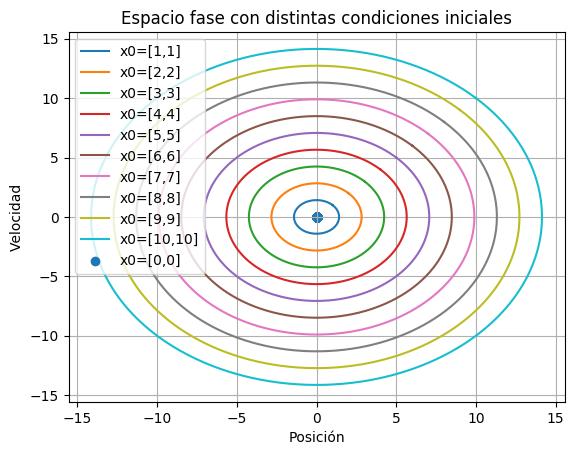

In [25]:
using PyPlot
X_8_0=metodo_RK4(F,[0,0],Ti,Tf,n8)
scatter(map(x->x[1],X_8_0[2]),map(x->x[2],X_8_0[2]),label="x0=[0,0]")
for i in 1:10
    X_8_i=metodo_RK4(F,[i,i],Ti,Tf,n8)
    plot(map(x->x[1],X_8_i[2]),map(x->x[2],X_8_i[2]),label="x0=[$i,$i]")
end
legend()
grid("on")
xlabel("Posición")
ylabel("Velocidad")
title("Espacio fase con distintas condiciones iniciales")
show()

Se esperaba que la condición inicial $(0,0)$ fuese un punto, y se obtuvo, además la simetría que se obserba es justo la que se esperaba debido a la expresión de la ecuación de movimiento. Donde debido a estas condiciones iniciales, se puede interpretar a la solución como si fuera una multiplicación por contantes a la ecuación de $x=\sin t+\cos t$. 

*****
```python
F F M G
```